# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
import pandas as pd
data_xls = pd.read_excel('geo.xlsx', 'Sheet1', index_col=None)
data_xls.to_csv('geo.csv', encoding='utf-8')

In [156]:
data = pd.read_csv('geo.csv', nrows=10000)
data_no = data[data['comment_class']== -1]
data_yes = data[data['comment_class']== 1]
data = data.drop(columns=['Unnamed: 0','comment_class'])
data_no = data_no.drop(columns=['Unnamed: 0','comment_class'])
data_yes = data_yes.drop(columns=['Unnamed: 0','comment_class'])

In [139]:
X = scaler.fit_transform(data)
X_no = scaler.fit_transform(data_no)
X_yes = scaler.fit_transform(data_yes)

In [168]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

def points_to_cluster(X):
    
    rcParams['figure.figsize'] = (12, 12)

    db = DBSCAN(eps=0.2, min_samples=5).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Estimated number of clusters: 80
Estimated number of noise points: 241
Silhouette Coefficient: 0.293


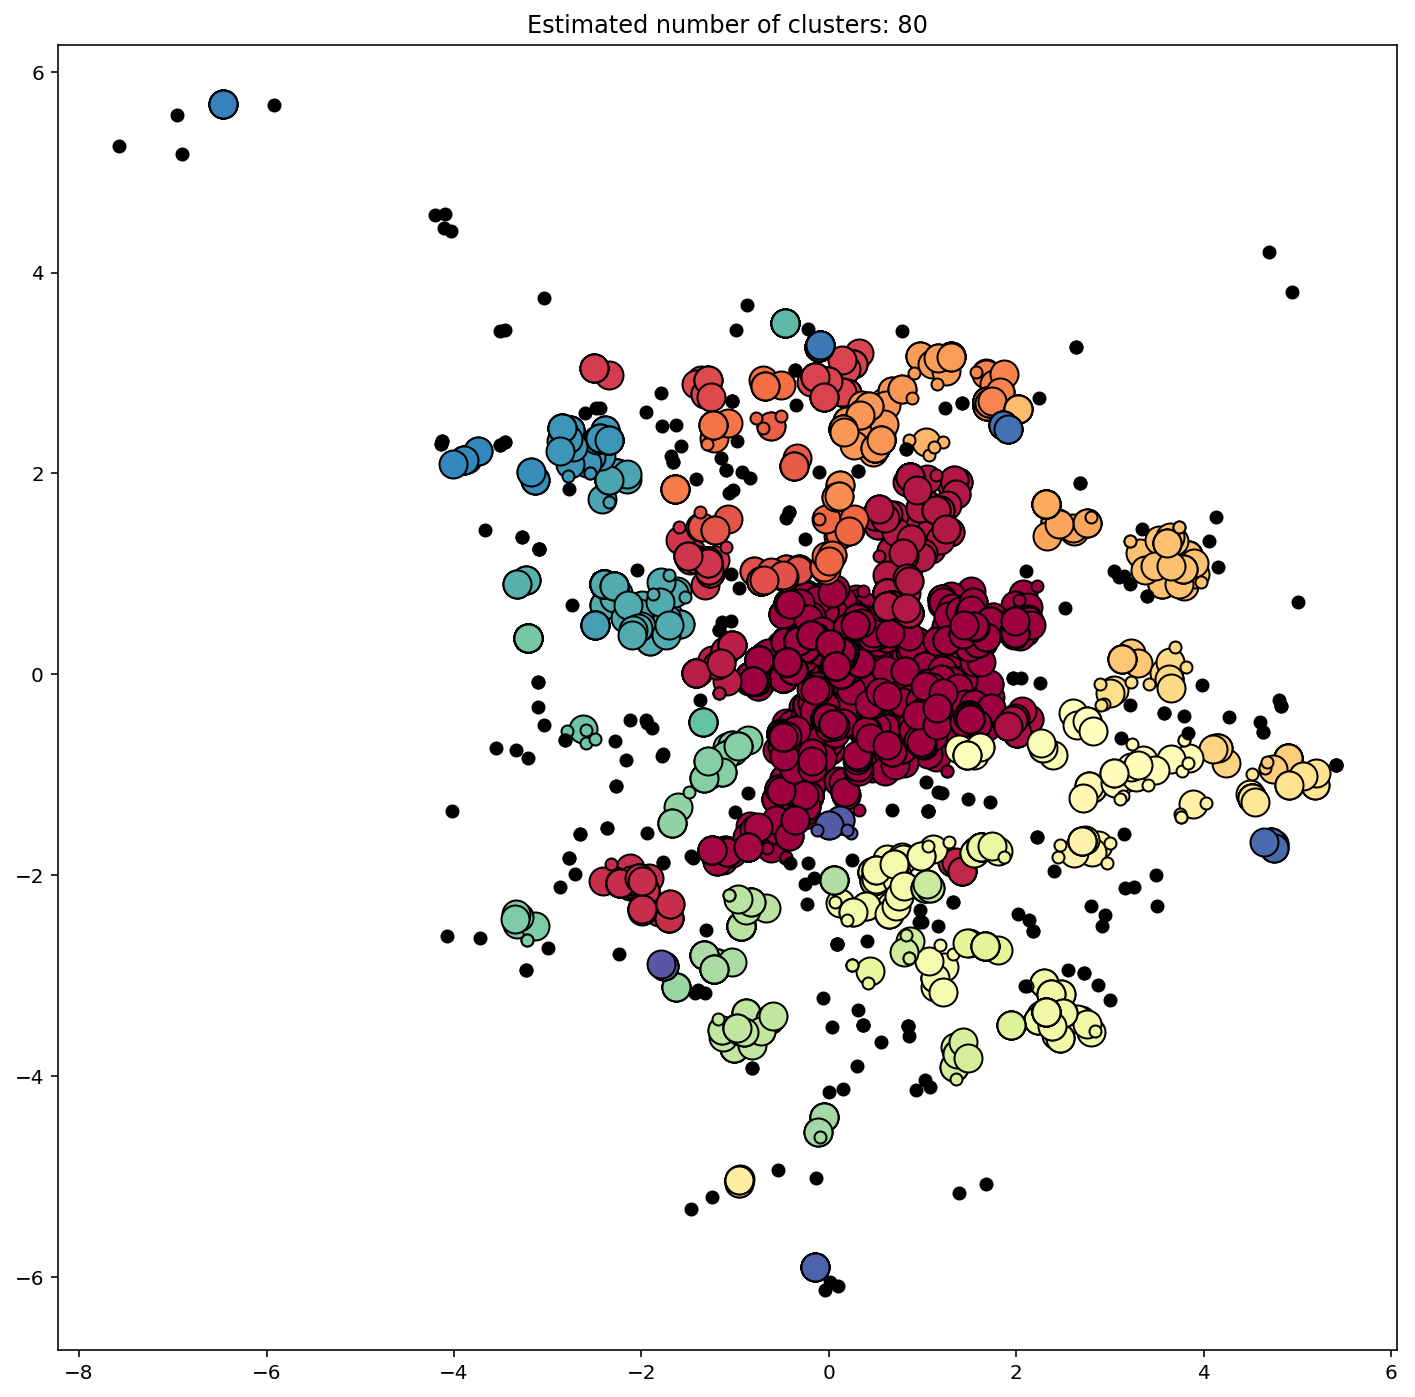

In [169]:
points_to_cluster(X)

## Найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

Estimated number of clusters: 72
Estimated number of noise points: 293
Silhouette Coefficient: 0.179


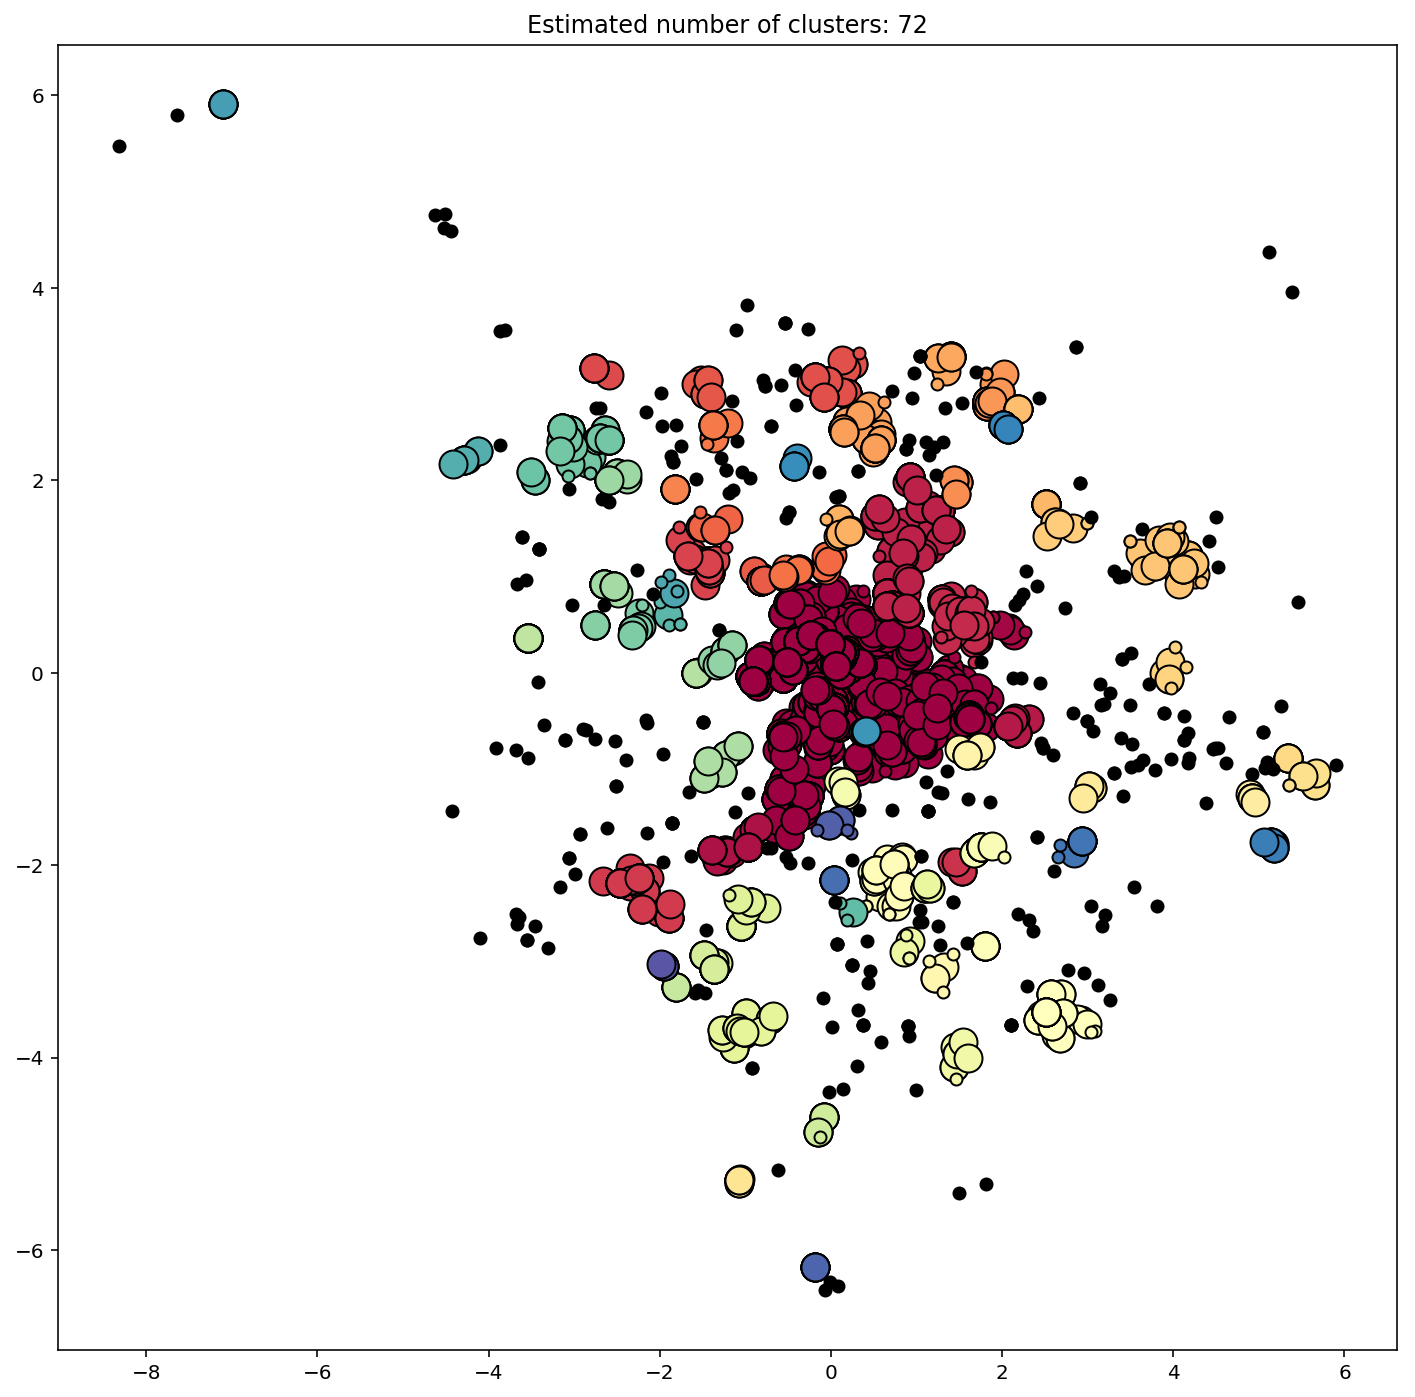

In [170]:
points_to_cluster(X_no)

Estimated number of clusters: 21
Estimated number of noise points: 130
Silhouette Coefficient: 0.318


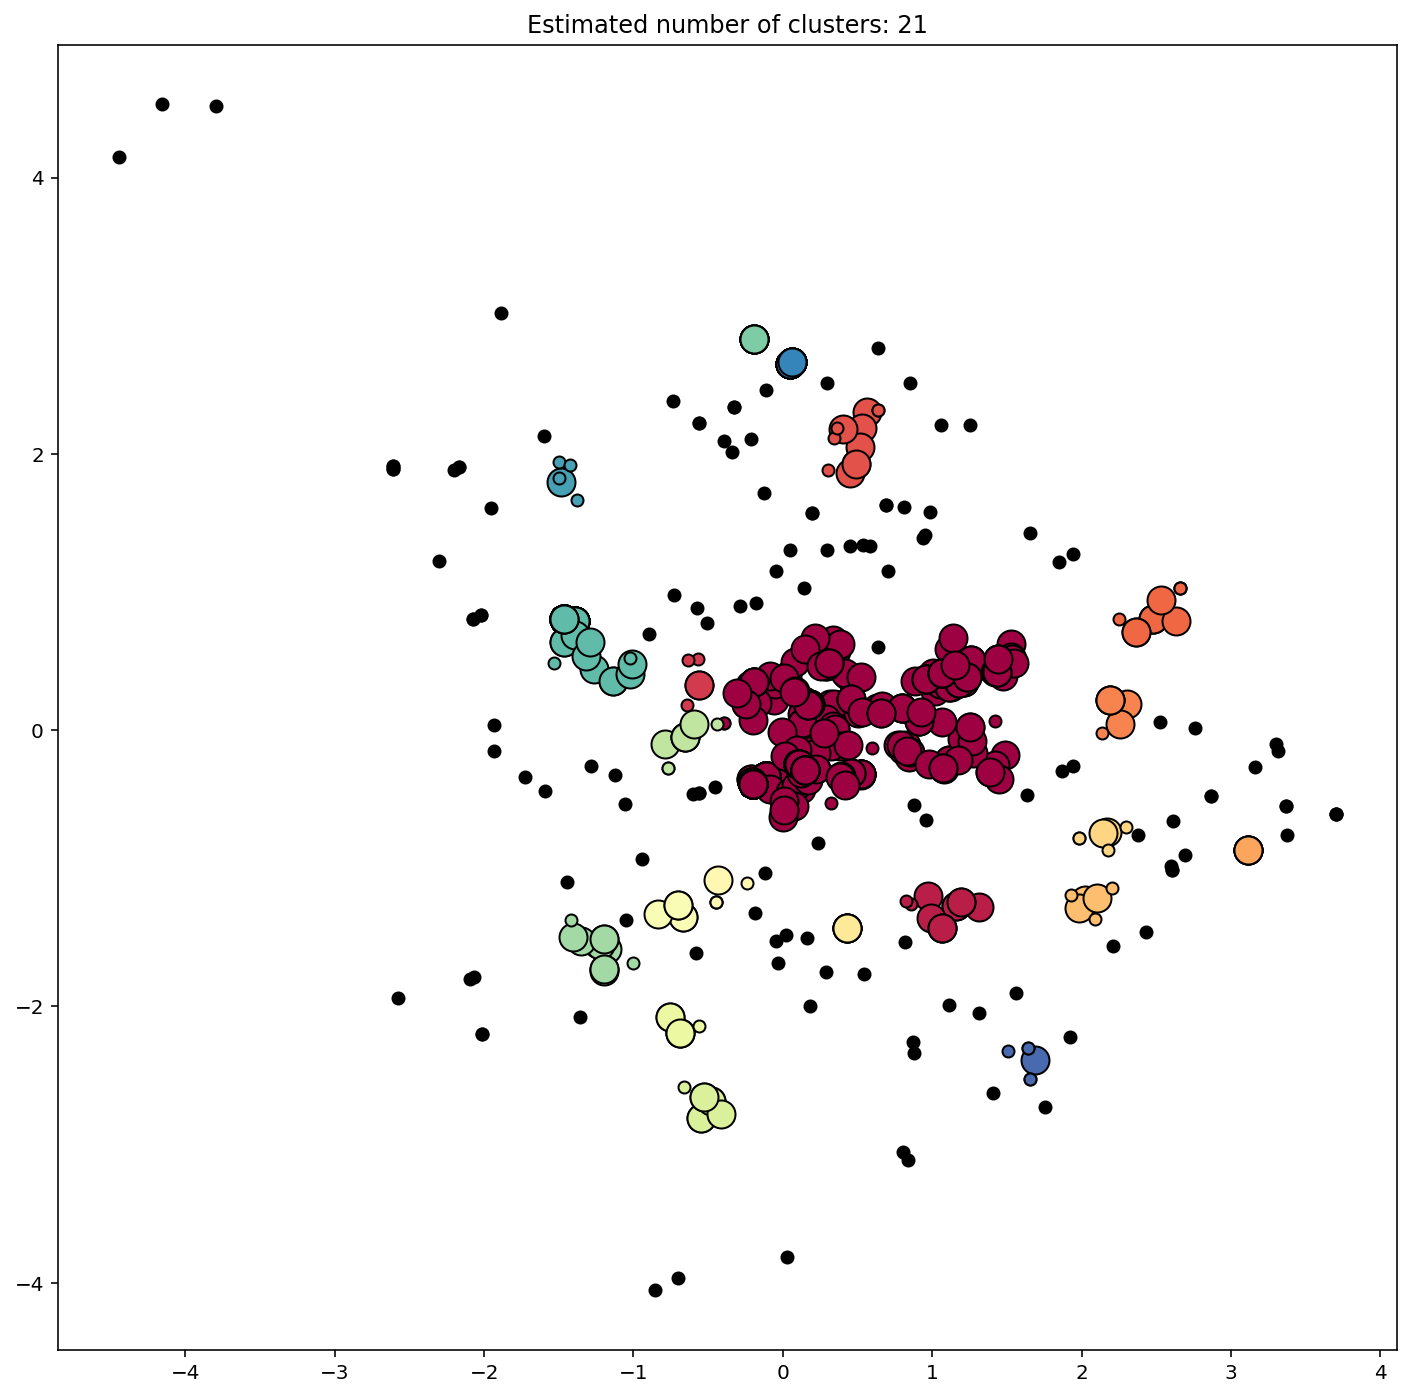

In [171]:
points_to_cluster(X_yes)

## Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия

In [43]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled )
    k_inertia.append(clf_kmeans.inertia_)

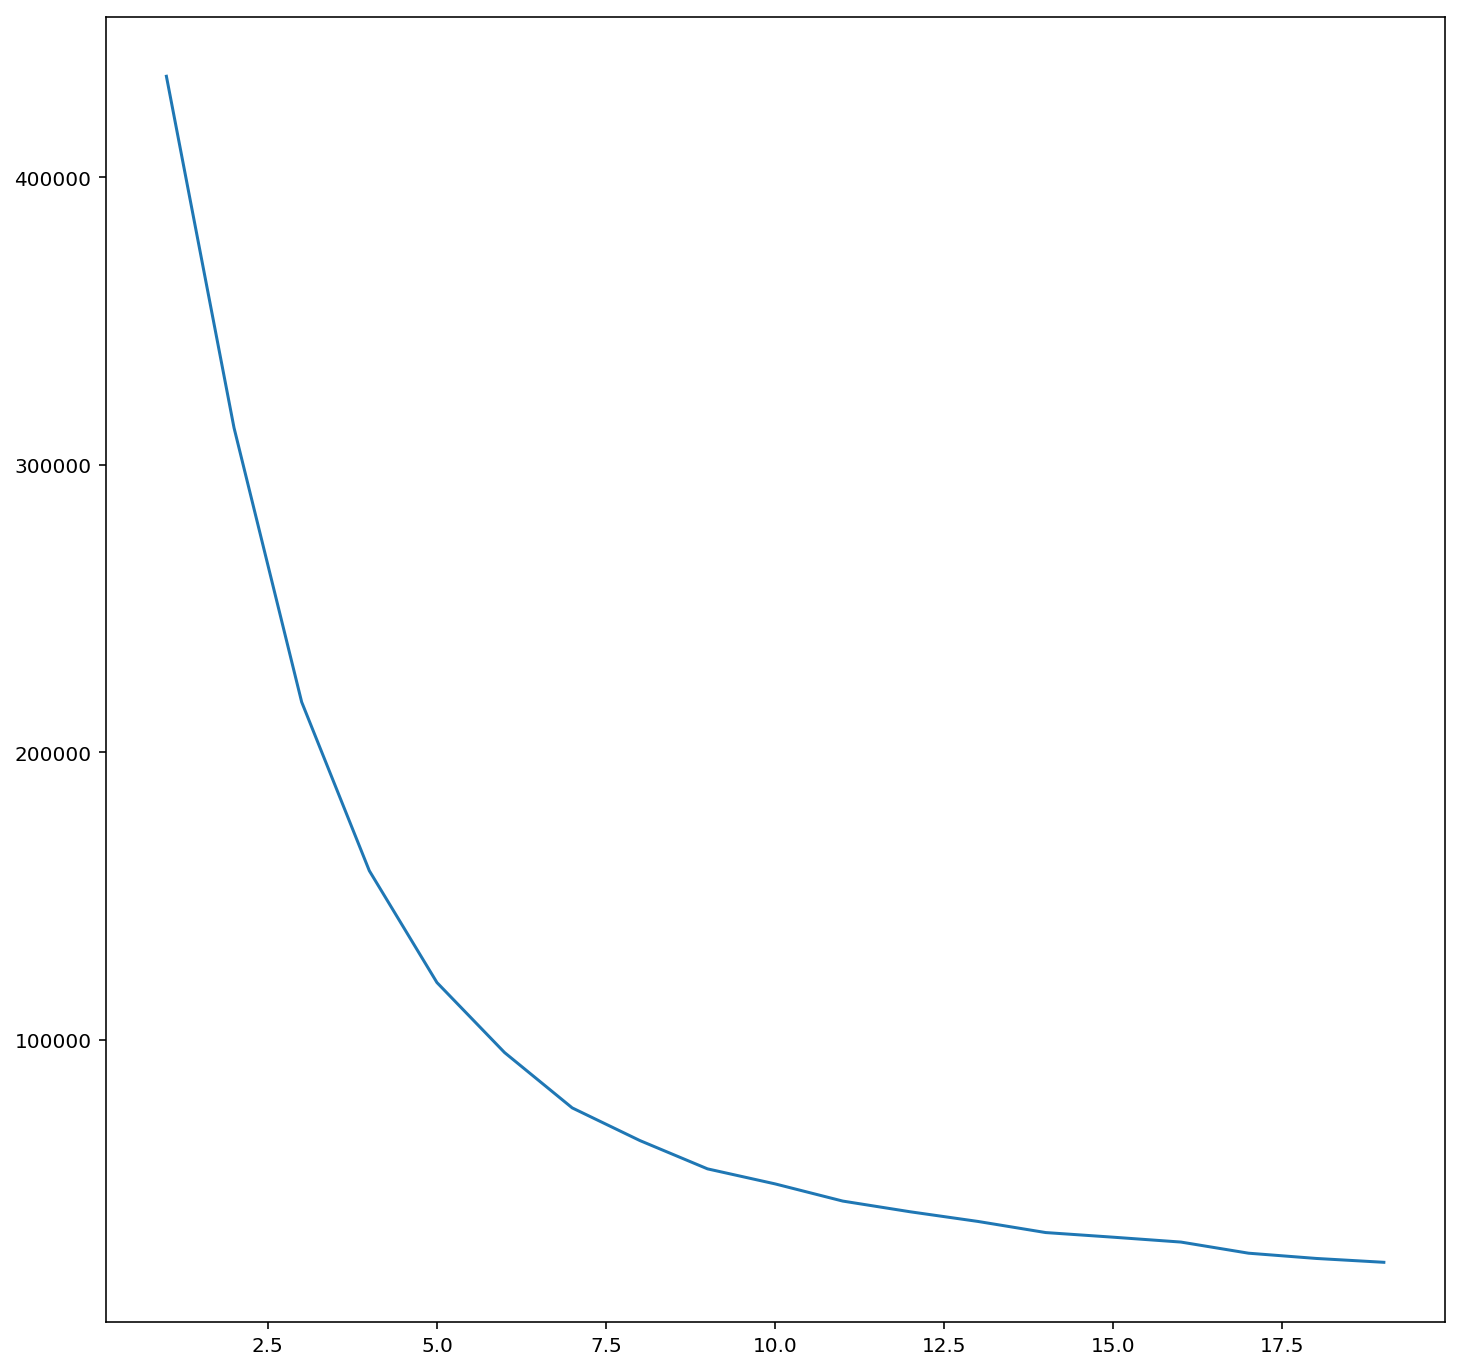

In [44]:
plt.plot(ks, k_inertia)

In [45]:
diff = np.diff(k_inertia)

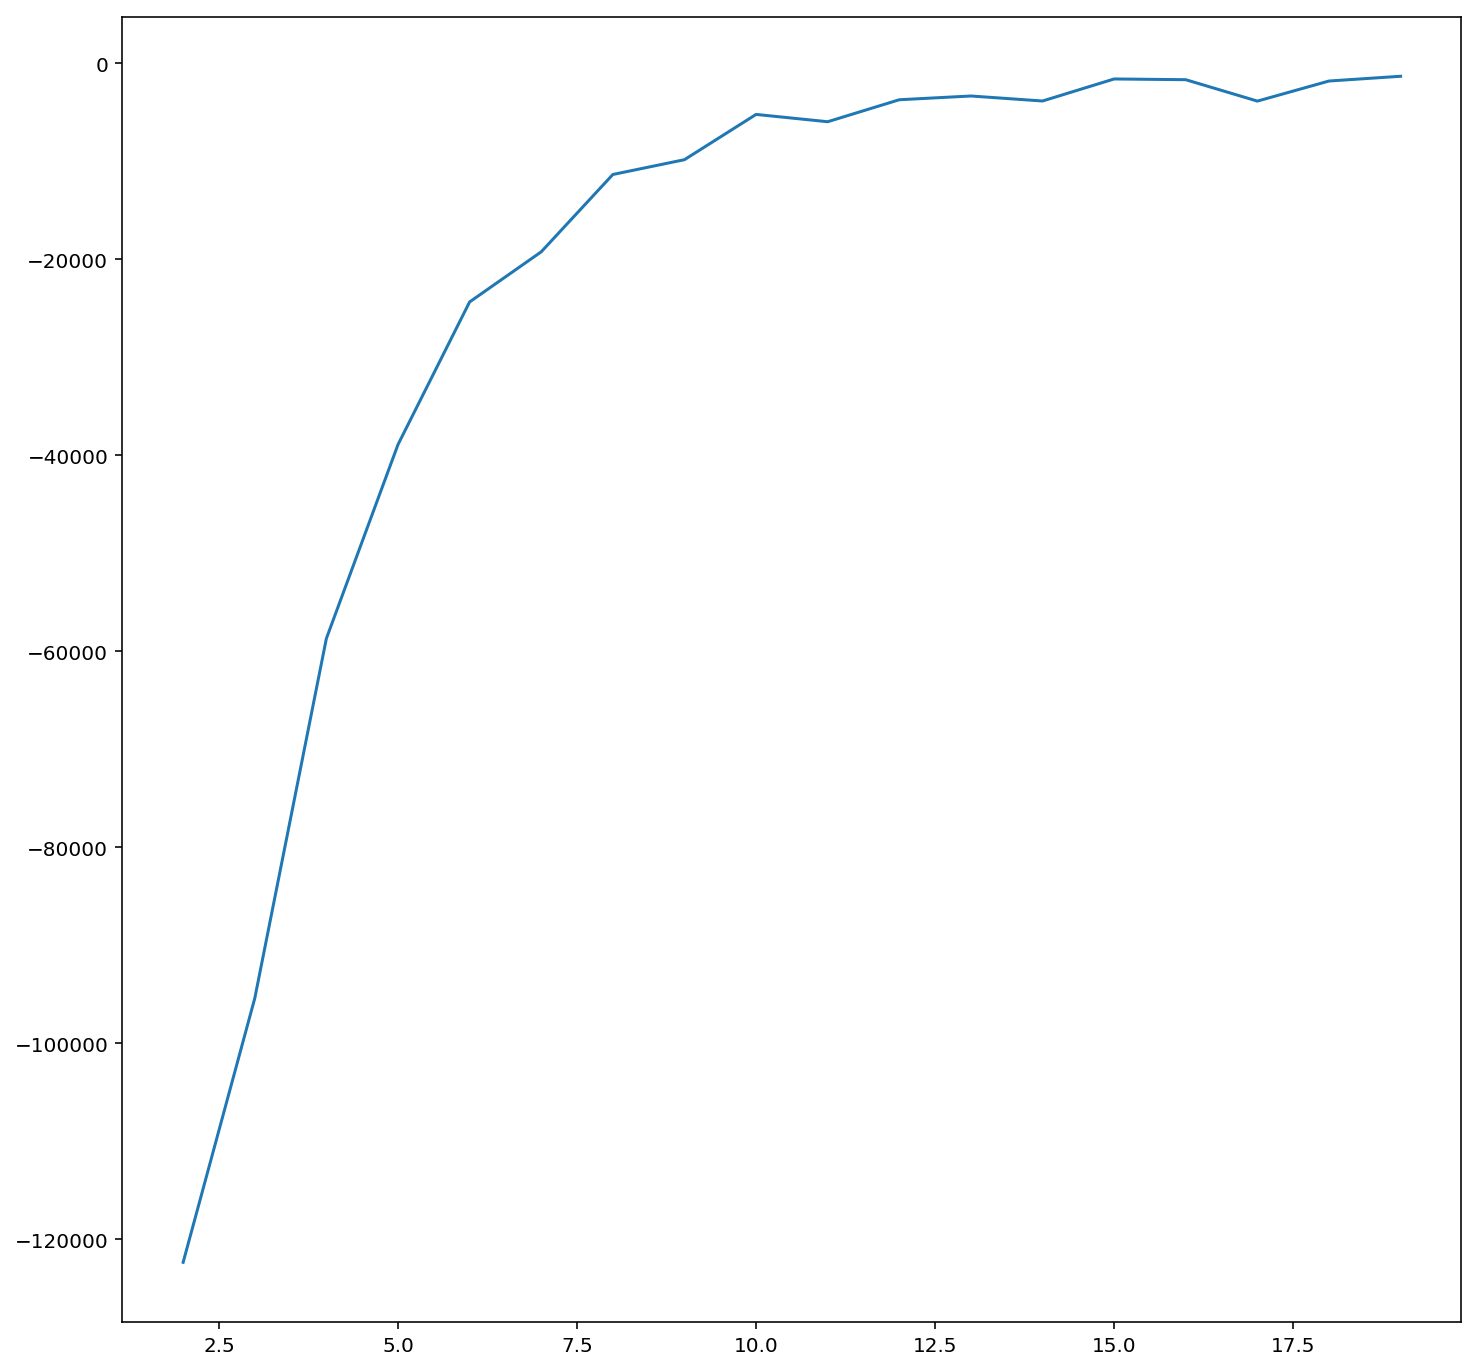

In [46]:
plt.plot(ks[1:], diff)

In [47]:
diff_r = diff[1:] / diff[:-1]

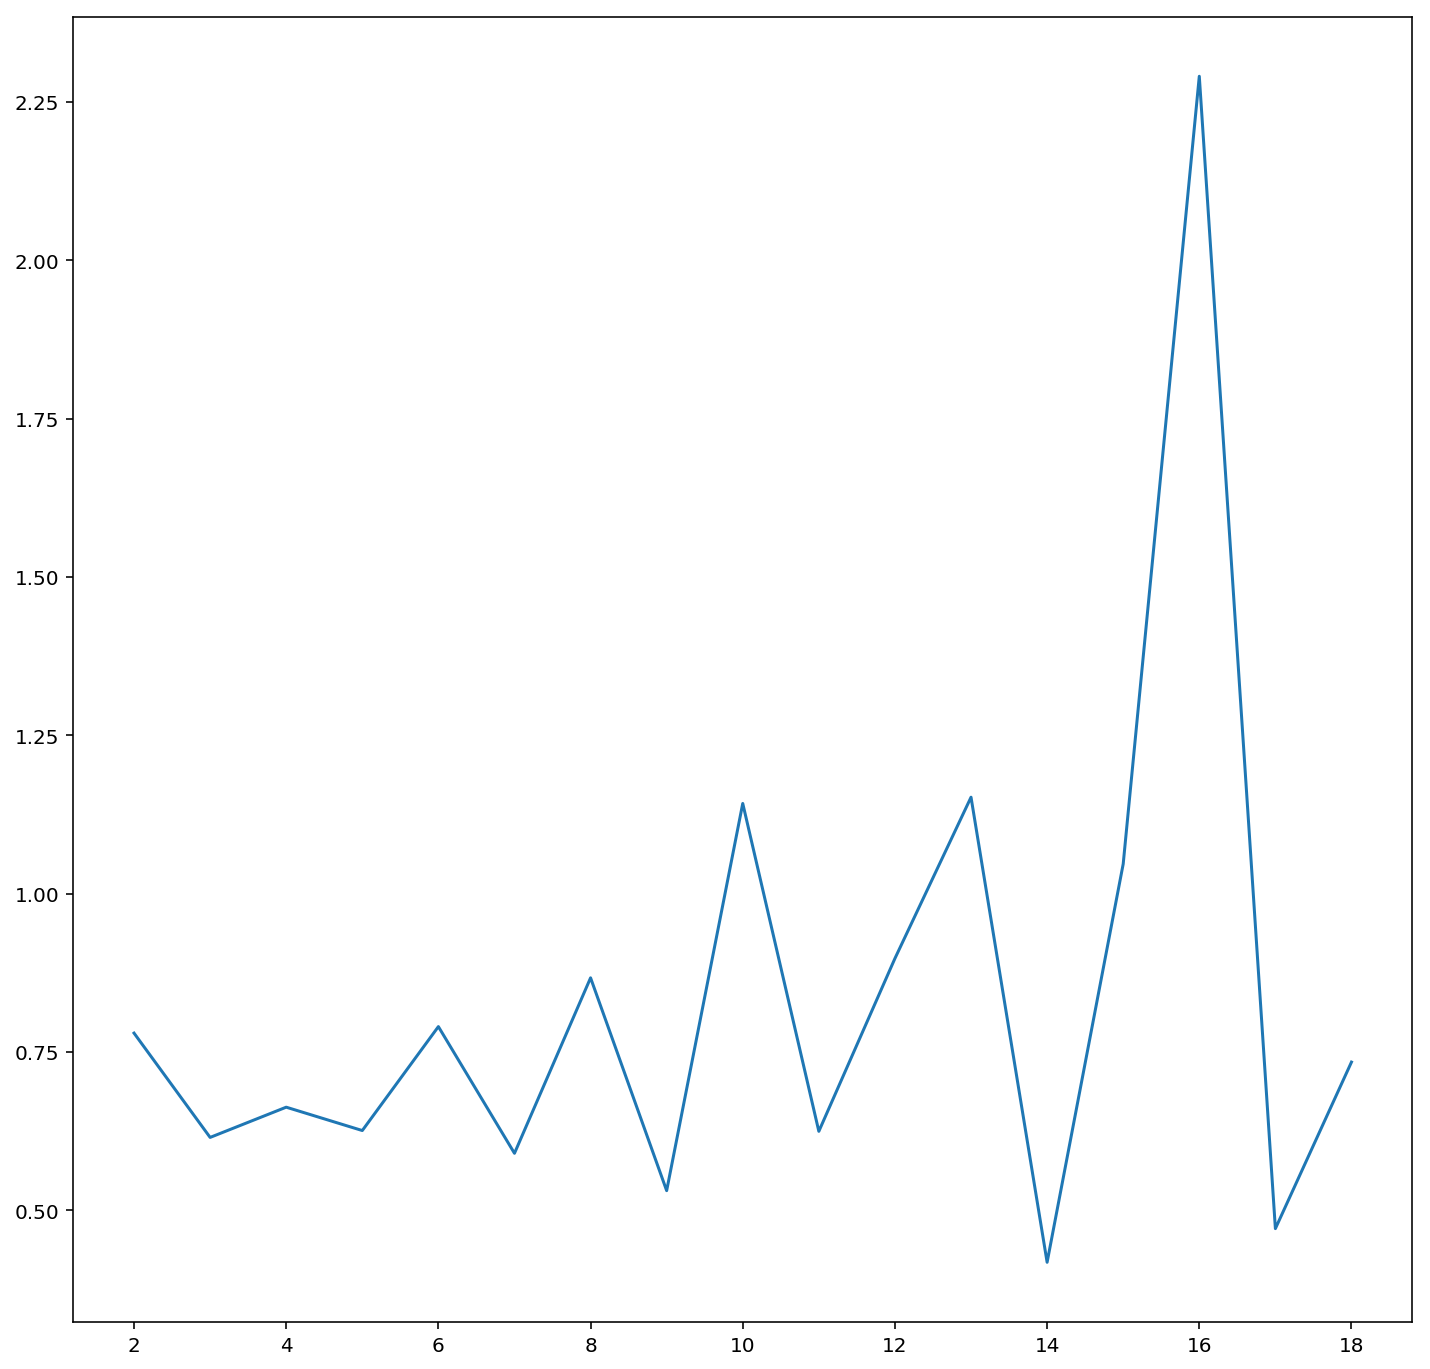

In [48]:
plt.plot(ks[1:-1], diff_r)

In [49]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

14

## Выделить основные тематики комментариев жителей

In [161]:
data_comment_xls = pd.read_excel('geo_comment.xlsx', 'Sheet1', index_col=None)
data_comment_xls.to_csv('geo_comment.csv', encoding='utf-8')

In [162]:
data_comment = pd.read_csv('geo_comment.csv')
data_comment.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


from gensim.corpora import TextCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel

class ListTextCorpus(TextCorpus):

    def get_texts(self):
        for doc in self.input:
            yield doc
            
comments = data_comment['comment'].tolist()
            
mycorp = ListTextCorpus(input=[x.split() for x in comments])
justlda = LdaModel(
    corpus=mycorp, num_topics=20, passes=12
)

In [167]:
## не успел, но столило убрать короткие слова и предлоги

justlda = LdaModel.load('top_comments')
for i in range(20):
    terms = justlda.get_topic_terms(i)
    print(i, ' '.join(map(lambda x: mycorp.dictionary.get(x[0]), terms)))

0 в по и публичных муниципального проект проекта ГПЗУ а слушаний
1 в по проект что и слушаний Москве публичных городе Правил
2 и на а в также застройки территории В Кодекса кодекс
3 и в на не ПЗЗ плану административном слушания градостроительный Проект
4 Свободы непосредственной с близости дома настоятельно территории нормам территория” ,
5 - соответствующей в с строительство ПЗЗ для зоне города Проектом
6 застройки землепользования и г. Правил в Северо-Западном Москвы градостроительному планируемого
7 и адресу 91 по проекта улице для детей. дополнительного нашему
8 Правил проект соответствии согласно и застройки № города с домов
9 в с и к Живописная, переработать означает, не домов метро,
10 с по стр. участка участке на земельного (далее придомовой 3.
11 и - объектов застройки в на не культурного № охраны
12 в города разрешенного и земельных Москвы использования с от 1
13 и застройки - № – объектов в с территории 23
14 в и округе не по с соответствии на для ПЗЗ
15 в Москвы и города на